In [98]:
from numpy import *
from matplotlib.pyplot import *

from scipy.fftpack import fft
from scipy.fftpack import ifft
from scipy.fftpack import dct
from scipy.fftpack import idct

In [99]:
def fftOp(N):
    n = arange(N)
    m = arange(N)[:,newaxis]
    return exp(-2*pi/N*1j*m*n)

def dctOp(N):
    n = arange(N)
    m = arange(N)[:,newaxis]
    return cos(pi/N*n*(m+0.5))

In [100]:
N = 30
A = fftOp(N)
D = dctOp(N)
print(A.shape, D.shape)

(30, 30) (30, 30)


In [101]:
x = random.rand(N)
y = A.dot(x)
max(abs(fft(x)-y))

3.693461051296783e-14

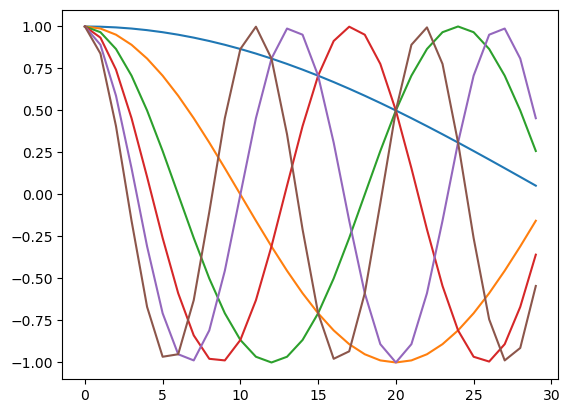

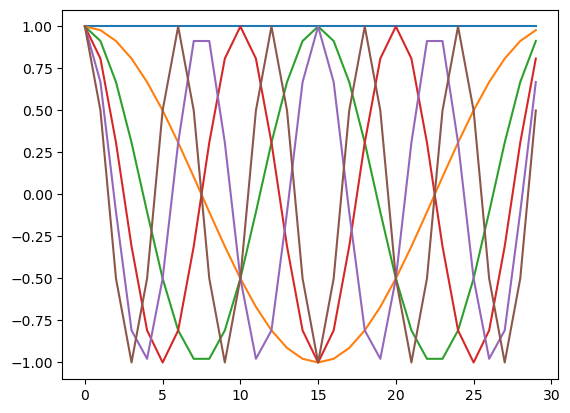

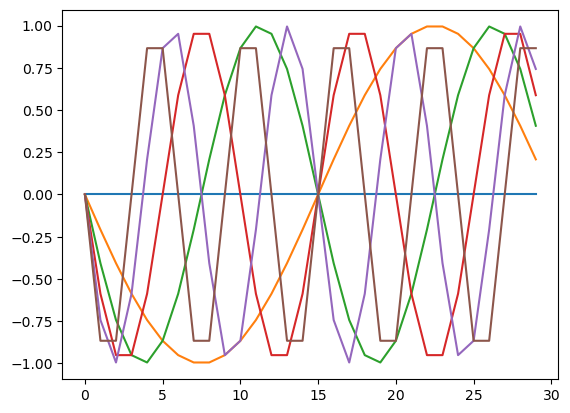

In [102]:
plot(D[:6,:].T)
show()
plot(real(A[:6,:]).T)
show()
plot(imag(A[:6,:]).T)

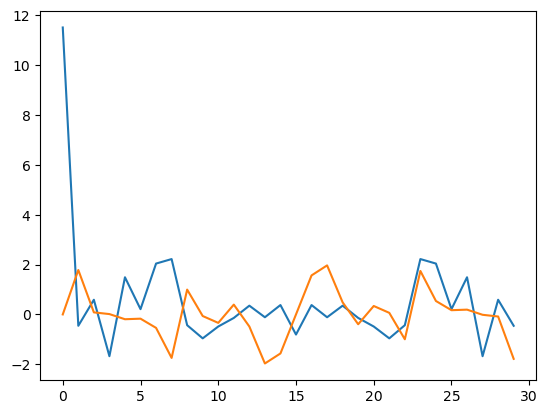

In [103]:
fftx = A.dot(x)

plot(real(fftx))
plot(imag(fftx))

In [104]:
x = linspace(0,1,10)

y = (x-.3)**2+1

yr = y[::-1]

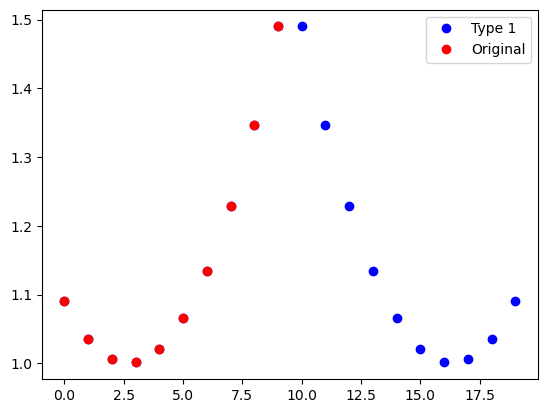

In [105]:
type1  = hstack((y,yr))
plot(type1, 'bo', label='Type 1')
plot(y, 'ro', label='Original')
legend()

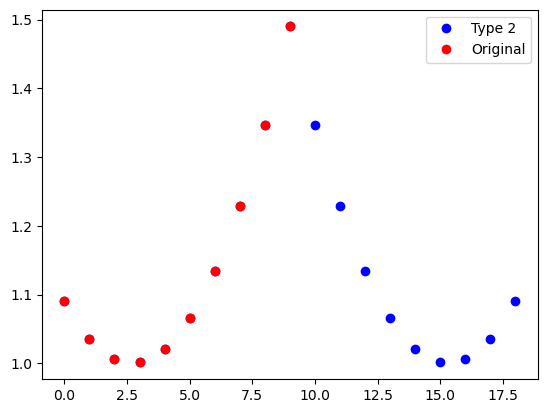

In [106]:
type2  = hstack((y,yr[1:]))
plot(type2, 'bo', label='Type 2')
plot(y, 'ro', label='Original')
legend()

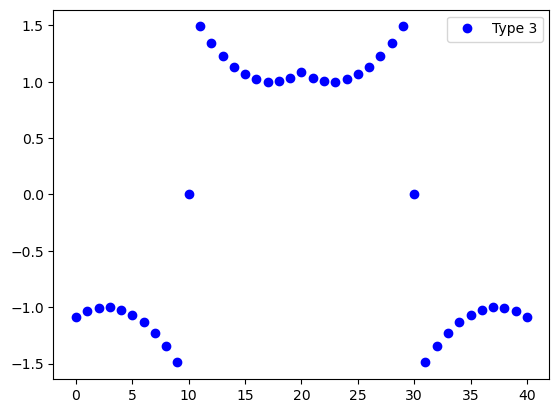

In [107]:
type3 = hstack((y,[0],-yr))
type3 = hstack((type3[:0:-1],type3))
plot(type3, 'bo', label='Type 3')
legend()

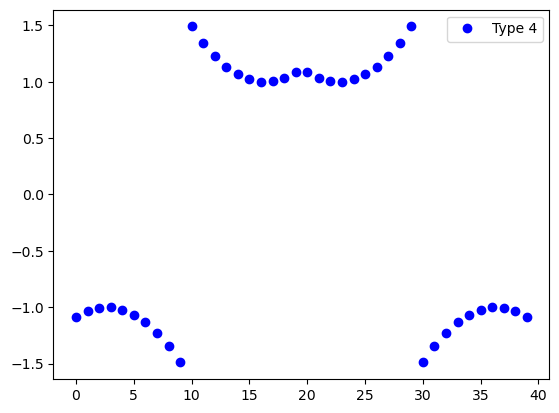

In [108]:
type4 = hstack((y,-yr))
type4 = hstack((type4[::-1],type4))
plot(type4, 'bo', label='Type 4')
legend()

In [109]:
fft1 = fft(type1)

In [110]:
dsc1 = dct(y, type=1)

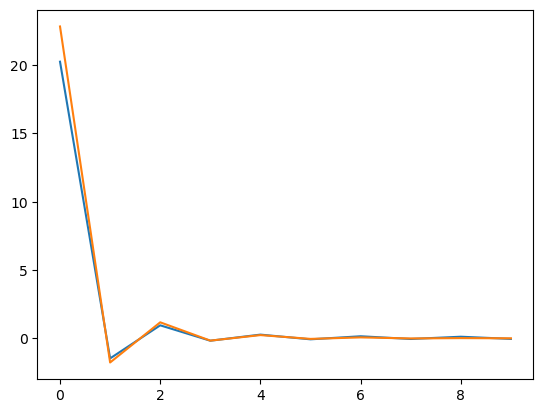

In [111]:
plot(dsc1)
plot(real(fft1[:len(dsc1)]))

In [77]:
real(fft1[:len(dsc1)])-dsc1

array([ 2.58      , -0.2977787 ,  0.21955148,  0.00658489, -0.03503972,
        0.03129281, -0.08297975,  0.0387937 , -0.10153201,  0.04332953])

In [113]:
N=32
A = dctOp(N)

In [114]:
Aline = A.T.reshape((N**2,))

A2d = einsum('i,j->ij',Aline, Aline)

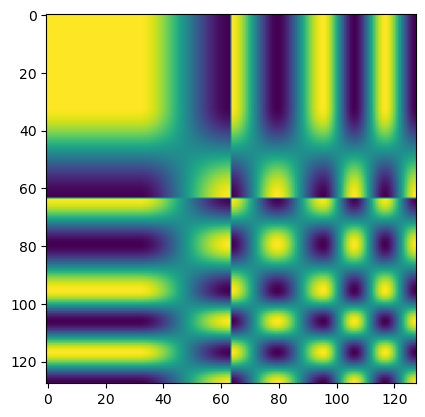

In [121]:
imshow(A2d[:32*4,:32*4])

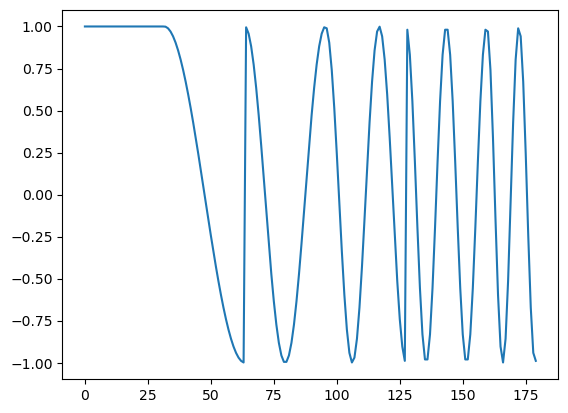

In [118]:
plot(A2d[0,:180])

(394, 394)


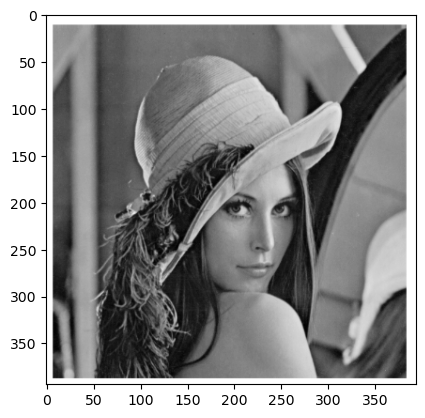

In [141]:
lena = imread('lena.png')[:,:394,0]
imshow(lena,cmap='gray')
print(lena.shape)

In [161]:
lenax = dct(lena, type=2, axis = 0) 
lenaxy = dct(lenax, type=2, axis = 1)

In [155]:
lenaxy[100:,:] = 0
lenaxy[:,100:] = 0

In [157]:
compression = 3.94**2
compression

15.5236

In [158]:
declenax = idct(lenaxy, type=2, axis = 1)
declena = idct(declenax, type=2, axis = 0)

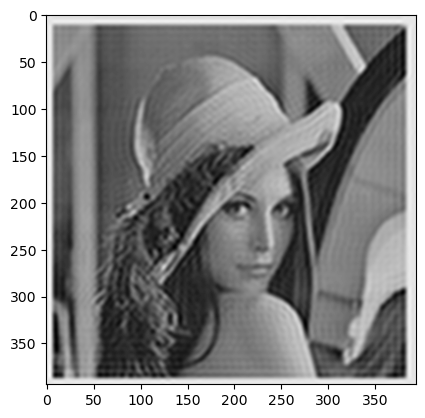

In [160]:
imshow(declena, cmap='gray')